<h1> Modelo de ML:</h1>

<h3> Modelo basado en el contenido de las peliculas:  </h3>

In [71]:
#Importamos todas las librerias necesarias:
import pandas as pd
import dask.dataframe as dd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt

In [72]:
#Importamos el CSV
df_main = pd.read_csv("C:/Users/tomif/Desktop/Proyecto_1/Datasets utilizados/Main.csv")

In [73]:
df_main

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,spoken_languagesiso_639_1,spoken_languagesname,spoken_languages_names,spoken_languages_iso,genres_ids,genres_names,release_year,return,actores,director
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,en,English,English,en,16.0,Animation,1995.0,12.451801,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","John Lasseter, Joss Whedon, Andrew Stanton, na..."
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,en,English,English,en,12.0,Adventure,1995.0,4.043035,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","nan, Jonathan Hensleigh, nan, Joe Johnston, Ro..."
2,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,en,English,English,en,10749.0,Romance,1995.0,0.000000,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Howard Deutch, Mark Steven Johnson, Mark Steve..."
3,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,...,en,English,English,en,35.0,Comedy,1995.0,5.090760,"Whitney Houston, Angela Bassett, Loretta Devin...","Forest Whitaker, nan, nan, nan, nan, nan, nan,..."
4,0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,...,en,English,English,en,35.0,Comedy,1995.0,0.000000,"Steve Martin, Diane Keaton, Martin Short, Kimb...","nan, nan, Nancy Meyers, Nancy Meyers, nan, Cha..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45341,0,30840,en,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0.0,104.0,Released,NaN,...,en,English,English,en,18.0,Drama,1991.0,0.000000,"Patrick Bergin, Uma Thurman, David Morrissey, ...","John Irvin, nan, nan, nan, nan, nan, nan, nan,..."
45342,0,111109,tl,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,Released,NaN,...,tl,NaN,NaN,tl,18.0,Drama,2011.0,0.000000,"Angel Aquino, Perry Dizon, Hazel Orencio, Joel...","Lav Diaz, Lav Diaz, nan, Lav Diaz, Lav Diaz, L..."
45343,0,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,90.0,Released,A deadly game of wits.,...,en,English,English,en,28.0,Action,2003.0,0.000000,"Erika Eleniak, Adam Baldwin, Julie du Page, Ja...","Mark L. Lester, C. Courtney Joyner, nan, nan, nan"
45344,0,227506,en,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,Released,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1917.0,0.000000,"Iwan Mosschuchin, Nathalie Lissenko, Pavel Pav...","Yakov Protazanov, nan"


In [74]:
df_main.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,spoken_languagesiso_639_1,spoken_languagesname,spoken_languages_names,spoken_languages_iso,genres_ids,genres_names,release_year,return,actores,director
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,en,English,English,en,16.0,Animation,1995.0,12.451801,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","John Lasseter, Joss Whedon, Andrew Stanton, na..."
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,en,English,English,en,12.0,Adventure,1995.0,4.043035,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","nan, Jonathan Hensleigh, nan, Joe Johnston, Ro..."
2,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,en,English,English,en,10749.0,Romance,1995.0,0.000000,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Howard Deutch, Mark Steven Johnson, Mark Steve..."
3,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,...,en,English,English,en,35.0,Comedy,1995.0,5.090760,"Whitney Houston, Angela Bassett, Loretta Devin...","Forest Whitaker, nan, nan, nan, nan, nan, nan,..."
4,0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,...,en,English,English,en,35.0,Comedy,1995.0,0.000000,"Steve Martin, Diane Keaton, Martin Short, Kimb...","nan, nan, Nancy Meyers, Nancy Meyers, nan, Cha..."


In [75]:
#Vamos a ver primero la cantidad de nulos que tiene el csv
df_main.isnull().sum()

budget                                0
id                                    0
original_language                    11
overview                            941
popularity                            0
release_date                          0
revenue                               0
runtime                             246
status                               80
tagline                           24959
title                                 0
vote_average                          0
vote_count                            0
genresid                           2384
genresname                         2384
production_companiesname          11789
production_companiesid            11789
production_countriesiso_3166_1     6209
production_countriesname           6208
spoken_languagesiso_639_1          3766
spoken_languagesname               3987
spoken_languages_names             3987
spoken_languages_iso               3766
genres_ids                         2384
genres_names                       2384


<h3>Para que nuestro modelo funcione a la perfeccion tenemos que modificar los nulos y para eso:</h3>

In [76]:
# Rellenamos valores nulos para columnas específicas
df_main['runtime'].fillna(df_main['runtime'].mean(), inplace=True)
df_main['original_language'].fillna(df_main['original_language'].mode()[0], inplace=True)
df_main['status'].fillna(df_main['status'].mode()[0], inplace=True)

# Rellenamos valores nulos categóricos con "Unknown"
columnas_categoricas = ['genresname', 'spoken_languagesname', 'actores', 'director']
for column in columnas_categoricas:
    df_main[column].fillna('Unknown', inplace=True)

# Eliminamos columnas irrelevantes
columnas_irrelevantes = ['tagline', 'production_companiesname', 'production_companiesid']
df_main.drop(columns=columnas_irrelevantes, inplace=True)

# Verificamos valores cero en `budget` y `revenue`
df_main = df_main[(df_main['budget'] == 0) | (df_main['revenue'] == 0)]

C:\Users\tomif\AppData\Local\Temp\ipykernel_5780\2088601781.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_main['runtime'].fillna(df_main['runtime'].mean(), inplace=True)
C:\Users\tomif\AppData\Local\Temp\ipykernel_5780\2088601781.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

<h3>Empezamos con nuestro Modelo RandomForest:</h3>

In [77]:
#Para trabajar con un modelo de RandomForest, vamos a dividir nuestro Main en un dataset mas chico que contenga las columnas que creemos necesarias

# Variables que deseamos mantener en el nuevo dataset
variables_deseadas = ['popularity', 'id','vote_average', 'vote_count', 'revenue']

# Crear un nuevo DataFrame con las variables seleccionadas
df_modelo1 = df_main[variables_deseadas].copy()

# Verificar el nuevo DataFrame
df_modelo1.head()

,popularity,id,vote_average,vote_count,revenue
2,11.712900,15602,6.5,92.0,0.0
4,8.387519,11862,5.7,173.0,76578911.0
6,6.677277,11860,6.2,141.0,0.0
7,2.561161,45325,5.4,45.0,0.0
11,5.430331,12110,5.7,210.0,0.0


In [78]:
df_modelo1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39971 entries, 2 to 45345
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    39971 non-null  float64
 1   id            39971 non-null  int64  
 2   vote_average  39971 non-null  float64
 3   vote_count    39971 non-null  float64
 4   revenue       39971 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.8 MB


<h3>Modelamiento:</h3>

In [79]:
# Seleccionar todas las columnas excepto la variable objetivo
X = df_modelo1.drop(columns=['popularity'])

# Variable objetivo
y = df_modelo1['popularity']

# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecimos con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 3.810128495710809
R^2: 0.5423825696350224


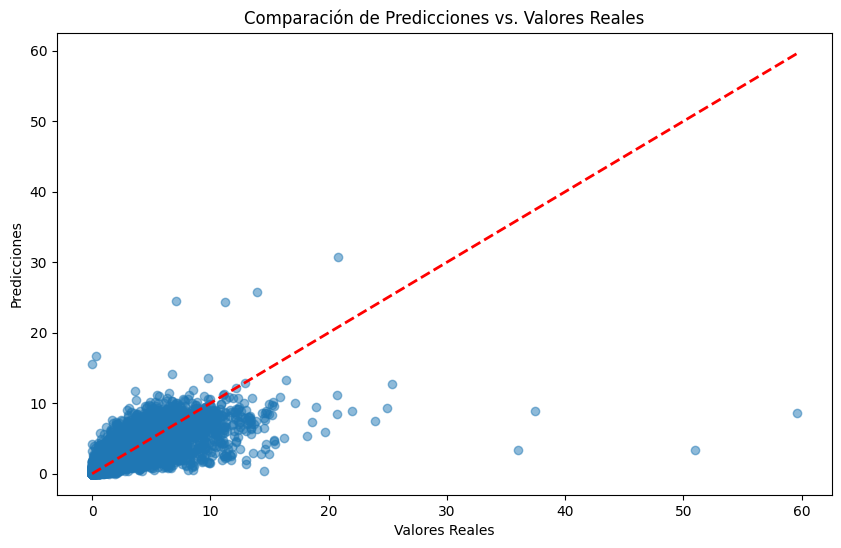

In [80]:
#Visualizamos el modelo Random Forest

# Creamos una gráfica de dispersión de las predicciones vs. los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs. Valores Reales')
plt.show()

In [81]:
# Vamos a hacer un codigo que nos indique las peliculas recomendadas con nuestro modelo

# Eliminamos la columna 'popularity' si está presente
X_peliculas = df_modelo1.drop('popularity', axis=1) 

# Predecimos la popularidad de las películas en df_movies
df_modelo1['predicted_popularity'] = model.predict(X_peliculas)

# Ordenamos las películas por popularidad predicha en orden descendente
df_predicciones = df_modelo1.sort_values(by='predicted_popularity', ascending=False)

# Seleccionamos las 10 películas con mayor popularidad predicha
top_10_peliculas = df_predicciones.head(10)

# Mostramos las 10 películas recomendadas
print(top_10_peliculas[['id', 'predicted_popularity']])

           id  predicted_popularity
44163  316154             56.510491
43199  348893             47.060926
44515  406990             43.387813
26518  284053             34.419438
44918  460846             34.145616
40162  372058             30.694033
45318  455661             30.689006
45088  417870             29.857824
41304  378064             26.989332
43187  418078             26.884224


<h3>Vamos a unir el dataset con la nueva columna de predicciones al main </h3>

In [82]:
# Unimos df_predicciones a df_main utilizando 'id' como referencia

df_main = pd.merge(df_main, df_predicciones[['id', 'predicted_popularity']], on='id', how='left')

In [83]:
df_main.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,spoken_languagesname,spoken_languages_names,spoken_languages_iso,genres_ids,genres_names,release_year,return,actores,director,predicted_popularity
0,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Grumpier Old Men,...,English,English,en,10749.0,Romance,1995.0,0.0,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Howard Deutch, Mark Steven Johnson, Mark Steve...",9.962515
1,0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,...,English,English,en,35.0,Comedy,1995.0,0.0,"Steve Martin, Diane Keaton, Martin Short, Kimb...","nan, nan, Nancy Meyers, Nancy Meyers, nan, Cha...",8.581570
2,58000000,11860,en,An ugly duckling having undergone a remarkable...,6.677277,1995-12-15,0.0,127.0,Released,Sabrina,...,Français,Français,fr,35.0,Comedy,1995.0,0.0,"Harrison Ford, Julia Ormond, Greg Kinnear, Ang...","Sydney Pollack, nan, Sydney Pollack, John Will...",7.329309
3,0,45325,en,"A mischievous young boy, Tom Sawyer, witnesses...",2.561161,1995-12-22,0.0,97.0,Released,Tom and Huck,...,English,English,en,28.0,Action,1995.0,0.0,"Jonathan Taylor Thomas, Brad Renfro, Rachael L...","nan, Stephen Sommers, Peter Hewitt, nan",2.539903
4,0,12110,en,When a lawyer shows up at the vampire's doorst...,5.430331,1995-12-22,0.0,88.0,Released,Dracula: Dead and Loving It,...,English,English,en,35.0,Comedy,1995.0,0.0,"Leslie Nielsen, Mel Brooks, Amy Yasbeck, Peter...","nan, Mel Brooks, Mel Brooks, Mel Brooks, nan, ...",7.471320


In [84]:
#Extraemos el dataset a csv con la columna de predicciones ya agregada

df_main.to_csv('C:/Users/tomif/Desktop/Proyecto_1/Datasets utilizados/Main.csv')

<h3>Funcion para la API </h3>

In [85]:
df_funcion = pd.read_csv('C:/Users/tomif/Desktop/Proyecto_1/Datasets utilizados/Main.csv')
df_funcion.head()

,Unnamed: 0,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,...,spoken_languagesname,spoken_languages_names,spoken_languages_iso,genres_ids,genres_names,release_year,return,actores,director,predicted_popularity
0,0,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,...,English,English,en,10749.0,Romance,1995.0,0.0,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Howard Deutch, Mark Steven Johnson, Mark Steve...",9.962515
1,1,0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,...,English,English,en,35.0,Comedy,1995.0,0.0,"Steve Martin, Diane Keaton, Martin Short, Kimb...","nan, nan, Nancy Meyers, Nancy Meyers, nan, Cha...",8.581570
2,2,58000000,11860,en,An ugly duckling having undergone a remarkable...,6.677277,1995-12-15,0.0,127.0,Released,...,Français,Français,fr,35.0,Comedy,1995.0,0.0,"Harrison Ford, Julia Ormond, Greg Kinnear, Ang...","Sydney Pollack, nan, Sydney Pollack, John Will...",7.329309
3,3,0,45325,en,"A mischievous young boy, Tom Sawyer, witnesses...",2.561161,1995-12-22,0.0,97.0,Released,...,English,English,en,28.0,Action,1995.0,0.0,"Jonathan Taylor Thomas, Brad Renfro, Rachael L...","nan, Stephen Sommers, Peter Hewitt, nan",2.539903
4,4,0,12110,en,When a lawyer shows up at the vampire's doorst...,5.430331,1995-12-22,0.0,88.0,Released,...,English,English,en,35.0,Comedy,1995.0,0.0,"Leslie Nielsen, Mel Brooks, Amy Yasbeck, Peter...","nan, Mel Brooks, Mel Brooks, Mel Brooks, nan, ...",7.471320


In [86]:
def recomendar_peliculas(titulo: str):
    # Filtramos el dataset para encontrar la película dada
    pelicula_dada = df_funcion[df_funcion['title'] == titulo]
    
    if pelicula_dada.empty:
        return f"No se encontró la película con el título: {titulo}"
    
    # Obtenemos el género de la película dada
    genero_dado = pelicula_dada.iloc[0]['genresname']
    
    # Filtramos el dataset para encontrar películas del mismo género
    peliculas_similares = df_funcion[df_funcion['genresname'].str.contains(genero_dado, na=False)]
    
    # Ordenamos por popularidad predicha en orden descendente
    peliculas_ordenadas = peliculas_similares.sort_values(by='predicted_popularity', ascending=False)
    
    # Excluimos la película dada de las recomendaciones (si está en la lista)
    peliculas_ordenadas = peliculas_ordenadas[peliculas_ordenadas['title'] != titulo]
    
    # Seleccionamos los títulos de las 5 mejores películas y mantener el orden
    recomendaciones = peliculas_ordenadas.head(5)[['title', 'genresname', 'predicted_popularity']].reset_index(drop=True)
    
    # Insertamos la película dada como primera fila en las recomendaciones
    recomendaciones = pd.concat([pelicula_dada[['title', 'genresname', 'predicted_popularity']], recomendaciones]).reset_index(drop=True)
    
    # Manejamos el caso donde no se encontró la película
    if isinstance(recomendaciones, str):
        print(recomendaciones)
    else:
    # Imprimimos la película seleccionada y las recomendaciones ordenadas por popularidad
        print(f"La película que eligió es: {recomendaciones.iloc[0]['title']} / Género: {recomendaciones.iloc[0]['genresname']} / Popularidad predicha: {recomendaciones.iloc[0]['predicted_popularity']}\n")
        print("Sus películas recomendadas son:\n")
    for idx, row in recomendaciones.iloc[1:].iterrows():
        print(f"{idx}. {row['title']} / Género: {row['genresname']} / Popularidad predicha: {row['predicted_popularity']}")
        print("\n")

    return recomendaciones

# Ejemplo de uso
titulo_pelicula = 'Enemy'
recomendaciones = recomendar_peliculas(titulo_pelicula)



La película que eligió es: Enemy / Género: Thriller / Popularidad predicha: 12.384864710000016

Sus películas recomendadas son:

1. The Bad Batch / Género: Thriller / Popularidad predicha: 56.51049078000008


2. Boyka: Undisputed IV / Género: Thriller / Popularidad predicha: 47.06092609999996


3. Mine / Género: Thriller / Popularidad predicha: 17.440062930000007


4. Overdrive / Género: Thriller / Popularidad predicha: 17.399316650000006


5. Black Butterfly / Género: Thriller / Popularidad predicha: 15.98575240000002


